In [1]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from catboost import CatBoostRegressor
import pandas as pd

In [14]:
url = "https://raw.githubusercontent.com/RimjimRazdan/cars_price_prediction/master/car%20data.csv"
data = pd.read_csv(url)

In [15]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
import datetime 
x = datetime.datetime.now()

In [17]:
year = x.year

In [18]:
data["age"] = year - data["Year"]

In [19]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [21]:
data.drop(['Year', "Car_Name", "Seller_Type"], axis=1, inplace=True)

In [22]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Manual,0,8
1,4.75,9.54,43000,Diesel,Manual,0,9
2,7.25,9.85,6900,Petrol,Manual,0,5
3,2.85,4.15,5200,Petrol,Manual,0,11
4,4.60,6.87,42450,Diesel,Manual,0,8


### We can use the pd.get_dummies method to create dummy variables instead of manually doing replace!

In [23]:
data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,8.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,4.000000
25%,0.900000,1.200000,15000.000000,0.000000,6.000000
50%,3.600000,6.400000,32000.000000,0.000000,8.000000
75%,6.000000,9.900000,48767.000000,0.000000,10.000000
max,35.000000,92.600000,500000.000000,3.000000,19.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Transmission   301 non-null    object 
 5   Owner          301 non-null    int64  
 6   age            301 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 16.6+ KB


In [26]:
data = pd.get_dummies(data, drop_first=True)

In [27]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,1
1,4.75,9.54,43000,0,9,1,0,1
2,7.25,9.85,6900,0,5,0,1,1
3,2.85,4.15,5200,0,11,0,1,1
4,4.60,6.87,42450,0,8,1,0,1


In [28]:
data.isna().sum()

Selling_Price          0
Present_Price          0
Kms_Driven             0
Owner                  0
age                    0
Fuel_Type_Diesel       0
Fuel_Type_Petrol       0
Transmission_Manual    0
dtype: int64

### Visualization: Scatterplot 

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


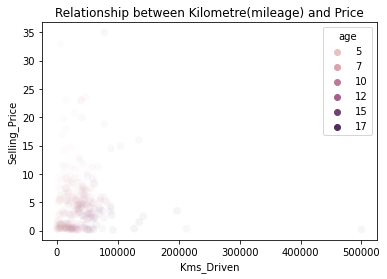

In [31]:
matplotlib.rcParams['figure.figsize'] = (16, 18)
fig = sns.scatterplot(y="Selling_Price", x="Kms_Driven", hue="age", data=data, s=60, alpha =0.05);
fig.set(xlabel = "Kms_Driven", ylabel = "Selling_Price", title = "Relationship between Kilometre(mileage) and Price");

### Visualization Boxplots

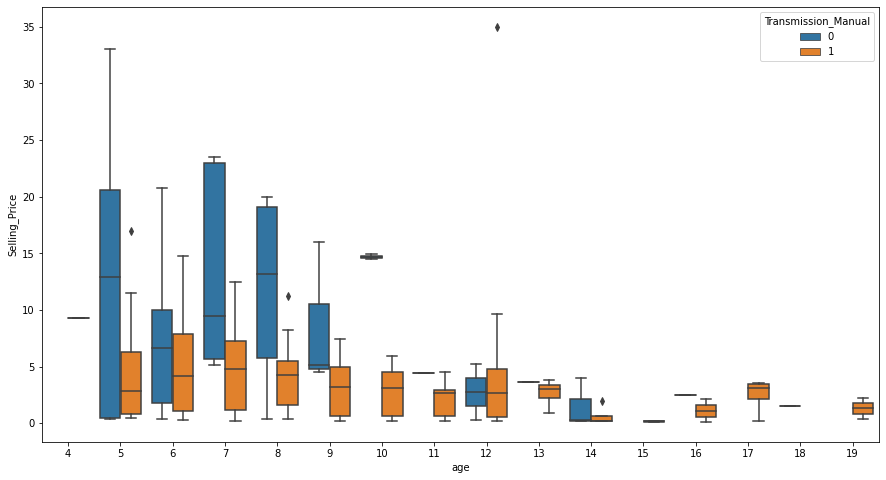

In [33]:
matplotlib.rcParams['figure.figsize'] = (16, 18)
plt.gcf().set_size_inches(15,8)
fig = sns.boxplot(y="Selling_Price", x="age", hue="Transmission_Manual", data=data);
plt.show()

In [35]:
import numpy as np

In [36]:
log_kms_driven = np.log(data["Kms_Driven"])

In [37]:
data["log_Kms_Driven"] = log_kms_driven

In [38]:
data.drop("Kms_Driven", axis=1, inplace=True)
data.head()

,Selling_Price,Present_Price,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,log_Kms_Driven
0,3.35,5.59,0,8,0,1,1,10.203592
1,4.75,9.54,0,9,1,0,1,10.668955
2,7.25,9.85,0,5,0,1,1,8.839277
3,2.85,4.15,0,11,0,1,1,8.556414
4,4.60,6.87,0,8,1,0,1,10.656082


### Creating the independent and dependent variables

In [39]:
X = data.drop("Selling_Price", axis =1) #independent variables
y = data["Selling_Price"].values.reshape(-1,1) #dependent

In [42]:
from sklearn.model_selection import train_test_split

#### splitting data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Now building the catboost model

In [47]:
model = CatBoostRegressor(iterations=6542, learning_rate=0.02, loss_function="RMSE")
model.fit(X_train, y_train, eval_set =(X_test, y_test))
#print(model.score(X, Y))

0:	learn: 5.0909349	test: 4.7390625	best: 4.7390625 (0)	total: 1.37ms	remaining: 8.96s
1:	learn: 5.0337525	test: 4.6816564	best: 4.6816564 (1)	total: 1.95ms	remaining: 6.37s
2:	learn: 4.9798131	test: 4.6318495	best: 4.6318495 (2)	total: 2.26ms	remaining: 4.92s
3:	learn: 4.9183438	test: 4.6009863	best: 4.6009863 (3)	total: 2.59ms	remaining: 4.23s
4:	learn: 4.8504475	test: 4.5409363	best: 4.5409363 (4)	total: 2.84ms	remaining: 3.71s
5:	learn: 4.7914435	test: 4.4857573	best: 4.4857573 (5)	total: 3.03ms	remaining: 3.3s
6:	learn: 4.7475914	test: 4.4527157	best: 4.4527157 (6)	total: 3.44ms	remaining: 3.21s
7:	learn: 4.6896896	test: 4.3989727	best: 4.3989727 (7)	total: 3.88ms	remaining: 3.17s
8:	learn: 4.6374477	test: 4.3510300	best: 4.3510300 (8)	total: 4.28ms	remaining: 3.1s
9:	learn: 4.5761511	test: 4.2980723	best: 4.2980723 (9)	total: 5.14ms	remaining: 3.36s
10:	learn: 4.5232014	test: 4.2391578	best: 4.2391578 (10)	total: 5.48ms	remaining: 3.25s
11:	learn: 4.4792262	test: 4.2035676	best: 

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [50]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = metrics.r2_score(y_test, pred)

/Users/mine/.local/lib/python3.8/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [51]:
r2

0.9843354668130422

In [53]:
print("Testing Performance")
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE:", rmse)
print("R^2:", r2)

Testing Performance
MAE: 0.4221752541642817
MSE: 0.35712159362860635
RMSE: 0.5975965140699921
R^2: 0.9843354668130422


(array([20.,  4.,  8.,  7., 10.,  2.,  3.,  1.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([ 0.20024   ,  1.25243894,  2.30463787,  3.35683681,  4.40903574,
         5.46123468,  6.51343361,  7.56563254,  8.61783148,  9.67003041,
        10.72222935, 11.77442828, 12.82662722, 13.87882615, 14.93102509,
        15.98322402, 17.03542296, 18.08762189, 19.13982083, 20.19201976,
        21.2442187 ]),
 <BarContainer object of 20 artists>)

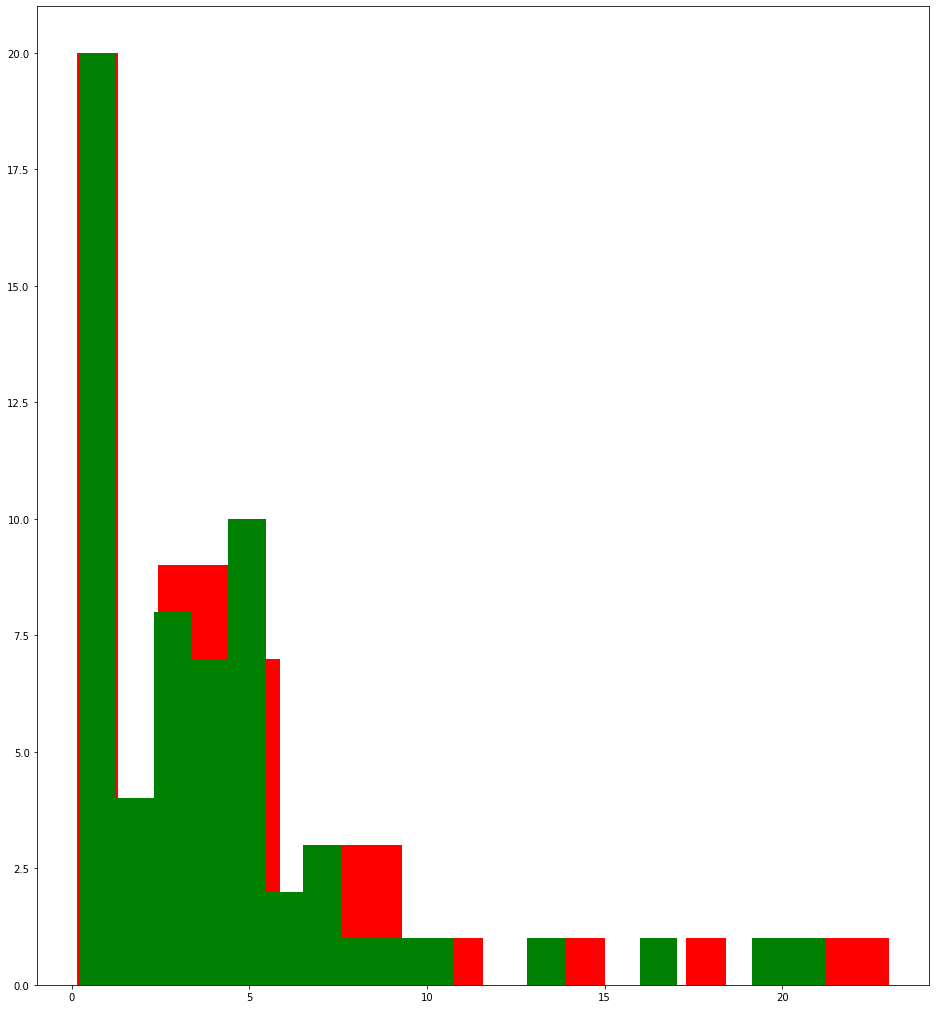

In [56]:
plt.hist(y_test, bins=20, color='r')
plt.hist(pred, bins=20, color='green')

In [40]:
np.reshape??

Signature: np.reshape(a, newshape, order='C')
Source:   
@array_function_dispatch(_reshape_dispatcher)
def reshape(a, newshape, order='C'):
    """
    Gives a new shape to an array without changing its data.

    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        el

In [60]:
pd.get_dummies??

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'Dtype | None' = None,
) -> 'DataFrame'
Source:   
def get_dummies(
    data,
    prefix=None,
    prefix_sep="_",
    dummy_na: bool = False,
    columns=None,
    sparse: bool = False,
    drop_first: bool = False,
    dtype: Dtype | None = None,
) -> DataFrame:
    """
    Convert categorical variable into dummy/indicator variables.

    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
      